In [ ]:
install.packages(c("corrplot","caret","tidyverse"))

# Load necessary libraries
library(tidyverse)
library(caret)
library(corrplot)

# Load the dataset
data <- read.csv("/content/creditcard.csv")

# View the first few rows of the dataset
head(data)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


corrplot 0.95 loaded



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0,-1.3598071,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,⋯,-0.018306778,0.277837576,-0.11047391,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,149.62,0
2,0,1.1918571,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,⋯,-0.225775248,-0.638671953,0.10128802,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,2.69,0
3,1,-1.3583541,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,⋯,0.247998153,0.771679402,0.90941226,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,378.66,0
4,1,-0.9662717,-0.18522601,1.7929933,-0.8632913,-0.01030888,1.24720317,0.23760894,0.37743587,-1.3870241,⋯,-0.108300452,0.005273597,-0.19032052,-1.17557533,0.6473760,-0.2219288,0.062722849,0.06145763,123.50,0
5,2,-1.1582331,0.87773675,1.5487178,0.4030339,-0.40719338,0.09592146,0.59294075,-0.27053268,0.8177393,⋯,-0.009430697,0.798278495,-0.13745808,0.14126698,-0.2060096,0.5022922,0.219422230,0.21515315,69.99,0
6,2,-0.4259659,0.96052304,1.1411093,-0.1682521,0.42098688,-0.02972755,0.47620095,0.26031433,-0.5686714,⋯,-0.208253515,-0.559824796,-0.02639767,-0.37142658,-0.2327938,0.1059148,0.253844225,0.08108026,3.67,0


In [ ]:
# Check for missing values
sum(is.na(data))

# Normalize the Amount column
data$Amount <- scale(data$Amount)

# Split the data into training and testing sets
set.seed(123)
train_indices <- sample(1:nrow(data), 0.7 * nrow(data))
train_data <- data[train_indices, ]
test_data <- data[-train_indices, ]

[1] 0

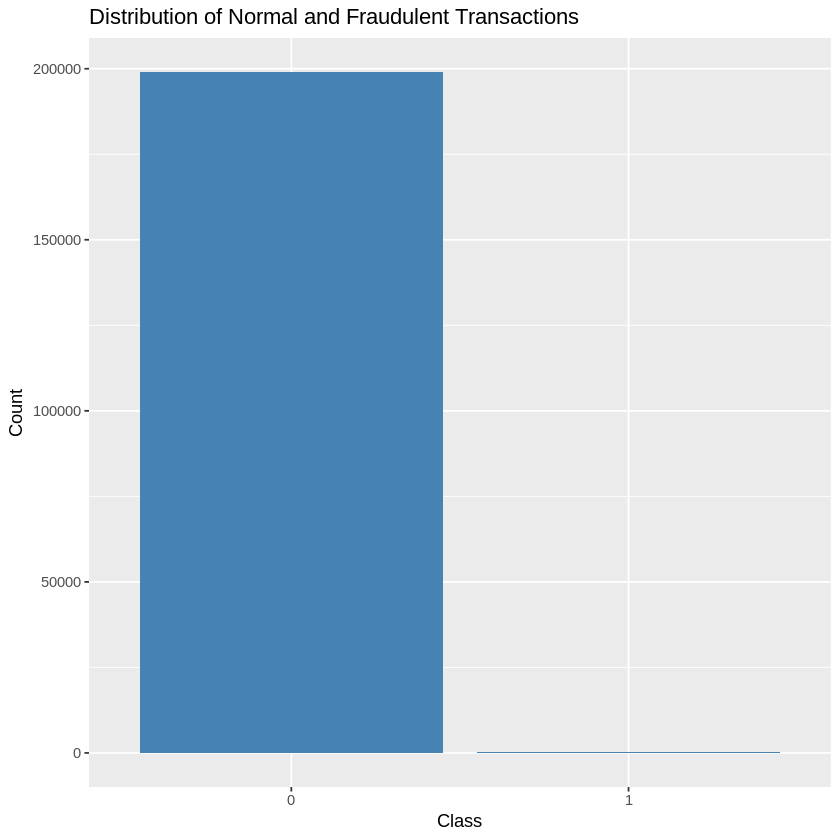

In [ ]:
# Plot the distribution
ggplot(train_data, aes(x = factor(Class))) +
  geom_bar(fill = "steelblue") +
  labs(title = "Distribution of Normal and Fraudulent Transactions",
       x = "Class",
       y = "Count")

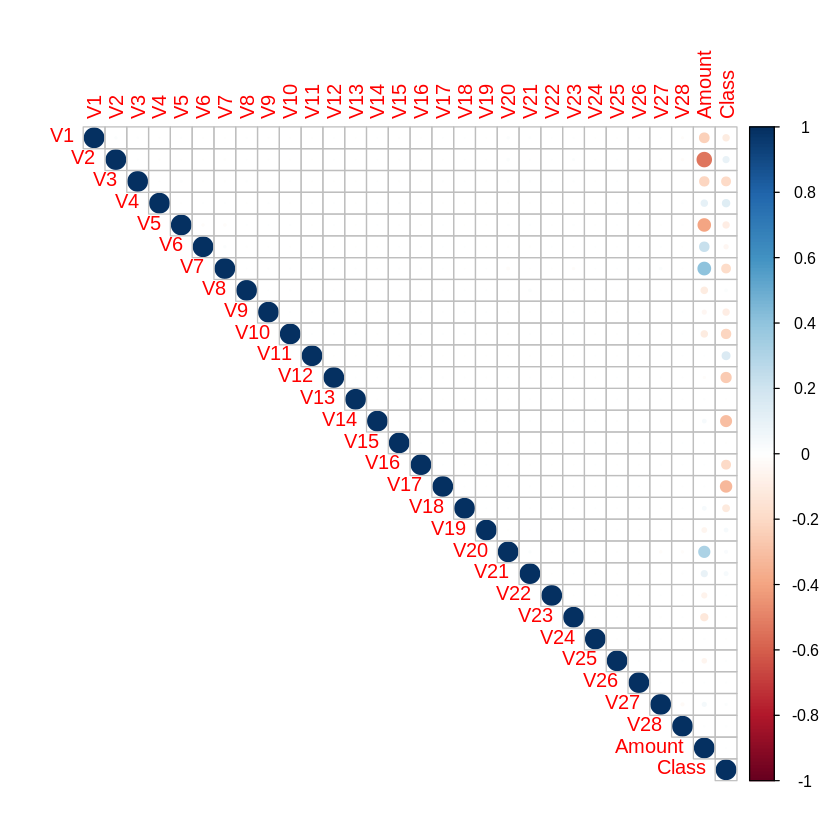

In [ ]:
# Correlation matrix
cor_matrix <- cor(train_data[, -1])
corrplot(cor_matrix, method = "circle", type = "upper")

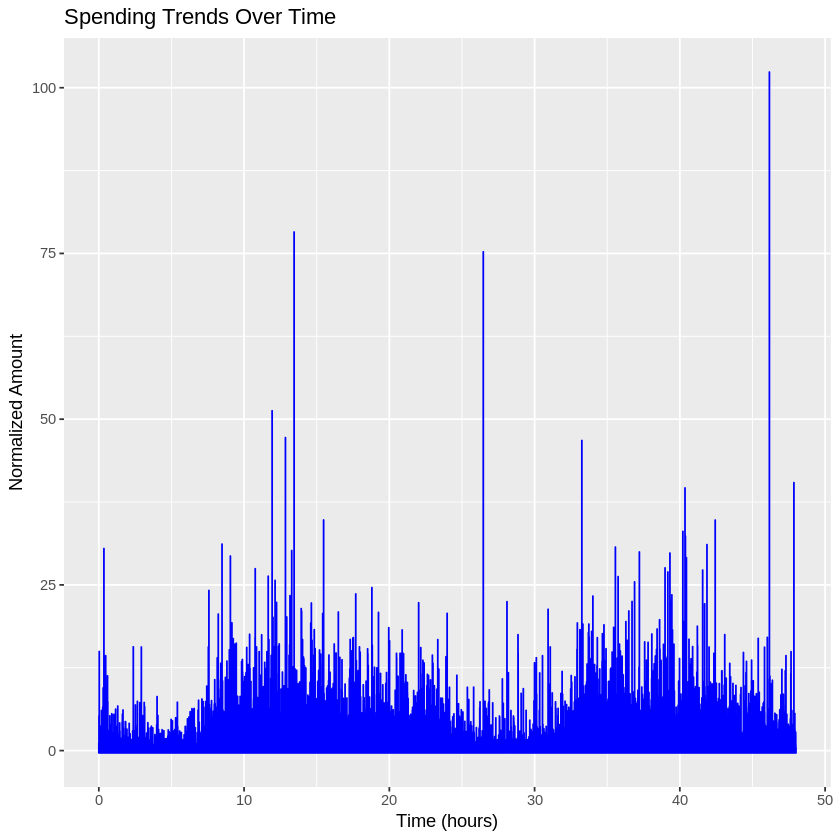

In [ ]:
# Convert 'Time' to a more interpretable format (e.g., hours)
data$Time_hours <- data$Time / 3600

# Plot spending trends over time
ggplot(data, aes(x = Time_hours, y = Amount)) +
  geom_line(color = "blue") +
  labs(title = "Spending Trends Over Time",
       x = "Time (hours)",
       y = "Normalized Amount")

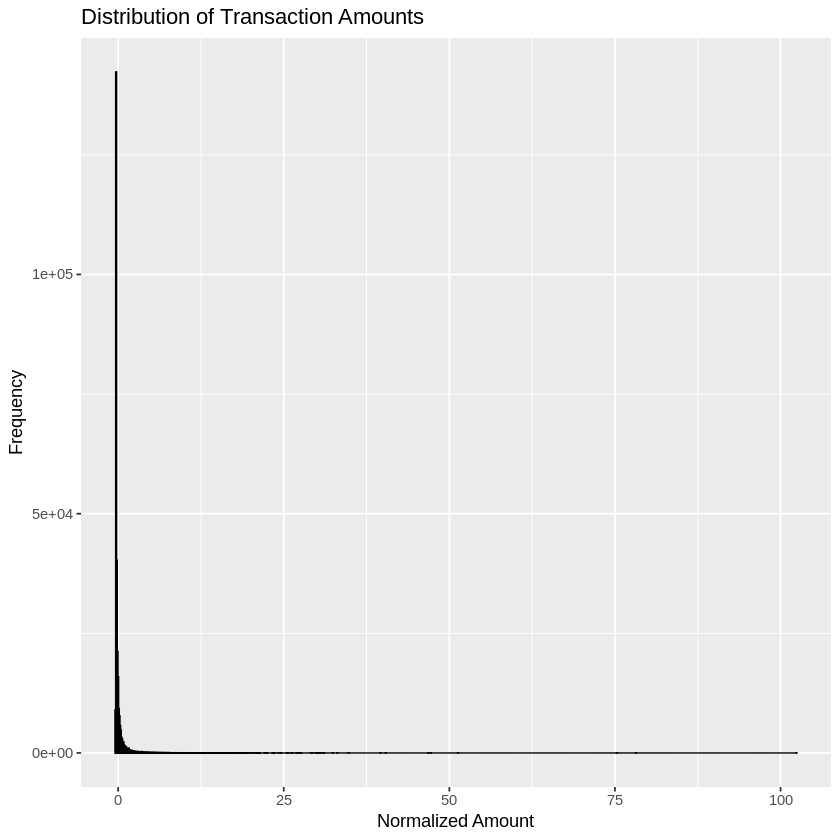

In [ ]:
# Plot the distribution of transaction amounts
ggplot(data, aes(x = Amount)) +
  geom_histogram(binwidth = 0.1, fill = "steelblue", color = "black") +
  labs(title = "Distribution of Transaction Amounts",
       x = "Normalized Amount",
       y = "Frequency")

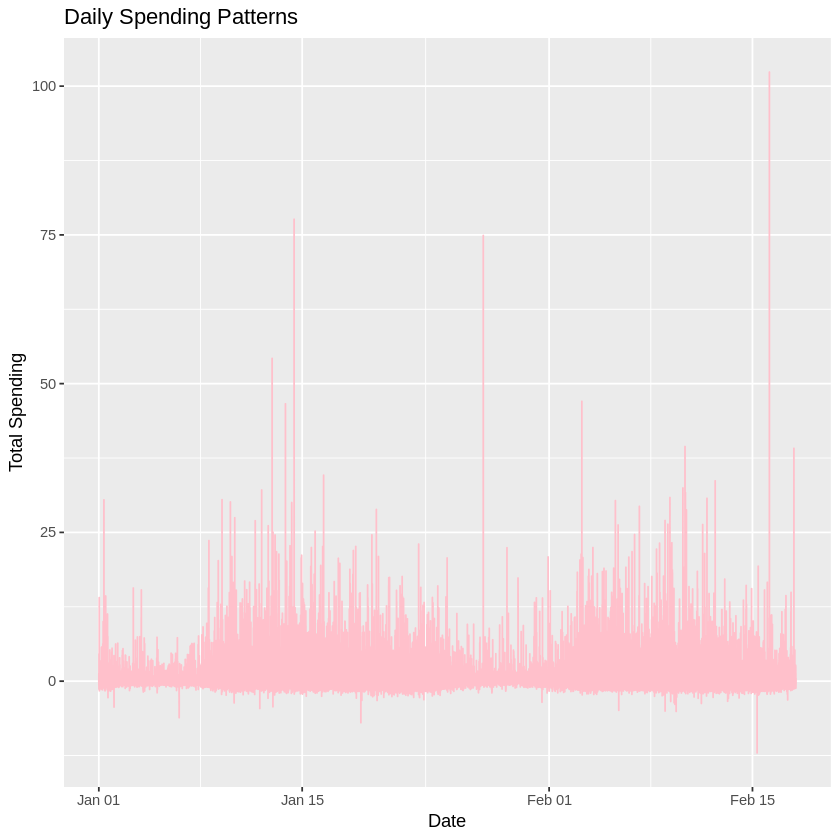

In [ ]:
# Convert 'Time_hours' to Date format
data$Date <- as.Date(data$Time_hours, origin = "1970-01-01")

# Summarize spending by date
daily_spending <- data %>%
  group_by(Date) %>%
  summarise(Total_Spending = sum(Amount))

# Plot daily spending trends
ggplot(daily_spending, aes(x = Date, y = Total_Spending)) +
  geom_line(color = "pink") +
  labs(title = "Daily Spending Patterns",
       x = "Date",
       y = "Total Spending")

In [ ]:
model <- glm(Class ~ ., data = train_data, family = binomial)

summary(model)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = Class ~ ., family = binomial, data = train_data)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.333e+00  2.948e-01 -28.268  < 2e-16 ***
Time        -3.654e-06  2.748e-06  -1.330 0.183633    
V1           1.252e-01  5.127e-02   2.442 0.014621 *  
V2          -2.456e-02  6.529e-02  -0.376 0.706772    
V3           3.688e-04  6.675e-02   0.006 0.995592    
V4           6.623e-01  7.920e-02   8.363  < 2e-16 ***
V5           4.142e-02  7.996e-02   0.518 0.604492    
V6          -1.582e-01  9.736e-02  -1.625 0.104268    
V7          -1.474e-01  7.714e-02  -1.910 0.056107 .  
V8          -1.736e-01  3.806e-02  -4.562 5.06e-06 ***
V9          -4.200e-01  1.230e-01  -3.415 0.000637 ***
V10         -7.142e-01  1.058e-01  -6.753 1.44e-11 ***
V11         -6.323e-02  9.803e-02  -0.645 0.518939    
V12          2.175e-01  1.080e-01   2.014 0.044030 *  
V13         -2.849e-01  1.005e-01  -2.833 0.004606 ** 
V14         -6.629e-01  7.523e-02  

In [ ]:
# Predict on the test data
pred_prob <- predict(model, test_data, type = "response")
pred_class <- ifelse(pred_prob > 0.5, 1, 0)

# Confusion matrix
confusionMatrix <- table(Predicted = pred_class, Actual = test_data$Class)
print(confusionMatrix)
cat("---------------","\n")

# Calculate accuracy, precision, recall, and F1 score
accuracy <- sum(diag(confusionMatrix)) / sum(confusionMatrix)
precision <- confusionMatrix[2, 2] / sum(confusionMatrix[2, ])
recall <- confusionMatrix[2, 2] / sum(confusionMatrix[, 2])
f1_score <- 2 * (precision * recall) / (precision + recall)

cat("Accuracy: ", accuracy, "\n")
cat("Precision: ", precision, "\n")
cat("Recall: ", recall, "\n")
cat("F1 Score: ", f1_score, "\n")

         Actual
Predicted     0     1
        0 85275    60
        1    14    94
--------------- 
Accuracy:  0.9991339 
Precision:  0.8703704 
Recall:  0.6103896 
F1 Score:  0.7175573 
